In [6]:
import os
print(os.getcwd())

C:\Users\asus


In [2]:
import sys
print(sys.version)

3.11.9 (tags/v3.11.9:de54cf5, Apr  2 2024, 10:12:12) [MSC v.1938 64 bit (AMD64)]


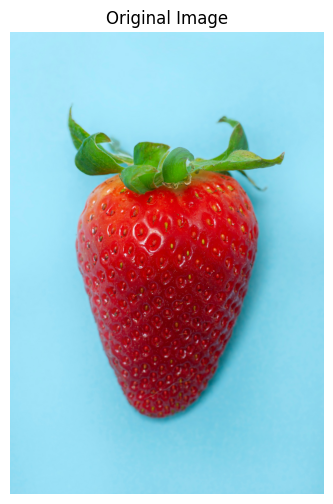

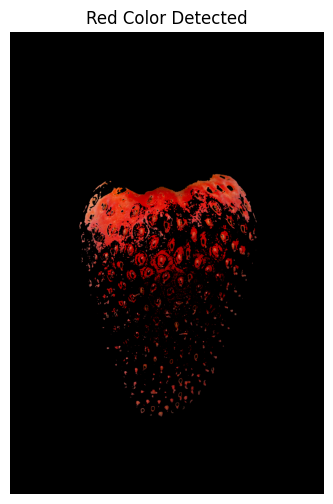

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to display images
def display_image(img, title="Image"):
    plt.figure(figsize=(8, 6))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

try:
    # Load an image (replace 'sample_image.jpg' with your image path)
    image = cv2.imread('C:\Users\asus\compVison\sample_image.jpg')

    # Check if image loaded successfully
    if image is None:
        raise FileNotFoundError("Could not load image. Please check the file path.")

    # Display original image
    display_image(image, "Original Image")

    # Convert to HSV color space
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Define range for red color in HSV
    lower_red = np.array([0, 120, 70])
    upper_red = np.array([10, 255, 255])

    # Create mask for red color
    mask = cv2.inRange(hsv_image, lower_red, upper_red)

    # Apply mask to original image
    result = cv2.bitwise_and(image, image, mask=mask)

    # Display masked image
    display_image(result, "Red Color Detected")

except FileNotFoundError as e:
    print(f"Error: {e}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

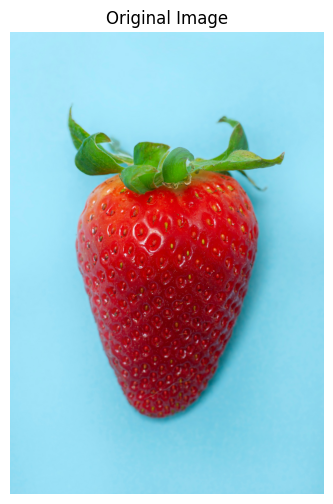

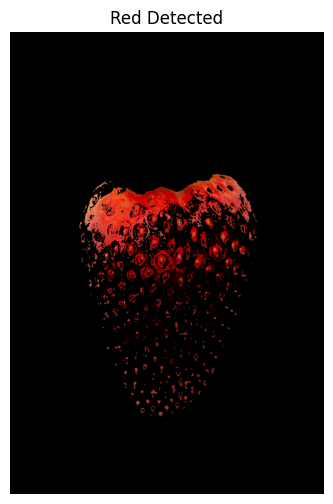

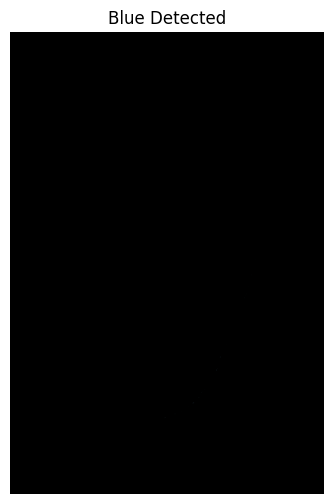

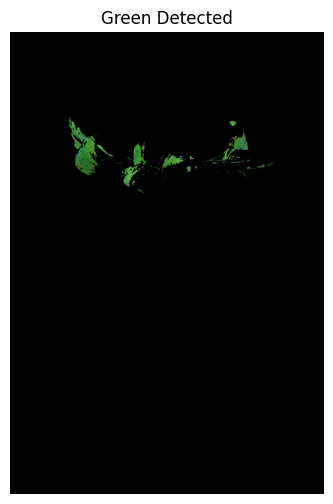

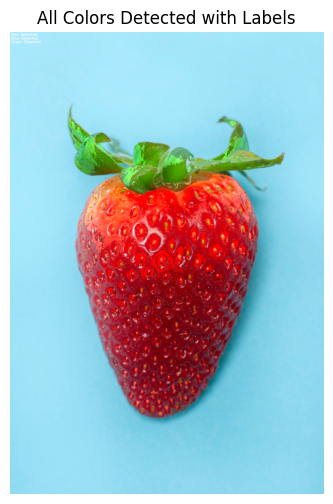

Red Pixels: 563074
Percentage of Red: 5.79%
Starting webcam. Press 'q' to quit (may require running in a .py file).


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to display images in Jupyter
def display_image(img, title="Image"):
    plt.figure(figsize=(8, 6))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

# Define color ranges in HSV (lower, upper bounds)
color_ranges = {
    "red": ([0, 120, 70], [10, 255, 255]),
    "blue": ([100, 120, 70], [130, 255, 255]),
    "green": ([50, 120, 70], [80, 255, 255])
}

try:
    # --- Static Image Processing ---
    # Load image from C:\Users\asus
    image_path = 'C:/Users/asus/sample_image.jpg'
    image = cv2.imread(image_path)

    if image is None:
        raise FileNotFoundError("Could not load image. Ensure 'sample_image.jpg' is in C:\\Users\\asus.")

    # Display original image
    display_image(image, "Original Image")

    # Convert to HSV
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Initialize output image for combined colors
    combined_result = image.copy()
    total_pixels = image.shape[0] * image.shape[1]
    red_pixels = 0

    # Detect and label each color
    for color_name, (lower, upper) in color_ranges.items():
        # Create mask for the color
        lower_bound = np.array(lower)
        upper_bound = np.array(upper)
        mask = cv2.inRange(hsv_image, lower_bound, upper_bound)

        # Count red pixels (only for red)
        if color_name == "red":
            red_pixels = cv2.countNonZero(mask)
            red_percentage = (red_pixels / total_pixels) * 100

        # Apply mask to get color-specific image
        color_result = cv2.bitwise_and(image, image, mask=mask)

        # Add label to the image
        label_position = (10, 30 + 30 * list(color_ranges.keys()).index(color_name))
        cv2.putText(combined_result, f"{color_name.capitalize()} Detected", label_position, 
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

        # Combine result
        combined_result = cv2.addWeighted(combined_result, 1, color_result, 0.5, 0)

        # Display individual color result
        display_image(color_result, f"{color_name.capitalize()} Detected")

    # Display combined result with labels
    display_image(combined_result, "All Colors Detected with Labels")

    # Print red pixel count and percentage
    print(f"Red Pixels: {red_pixels}")
    print(f"Percentage of Red: {red_percentage:.2f}%")

    # --- Real-Time Webcam Processing ---
    # Note: Webcam may not work in Jupyter via Chrome; try in a .py file if needed
    print("Starting webcam. Press 'q' to quit (may require running in a .py file).")
    cap = cv2.VideoCapture(0)  # 0 = default webcam

    if not cap.isOpened():
        print("Error: Could not open webcam. Ensure your camera is connected.")
    else:
        while True:
            ret, frame = cap.read()
            if not ret:
                print("Error: Could not read webcam frame.")
                break

            # Convert frame to HSV
            hsv_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

            # Process each color
            for color_name, (lower, upper) in color_ranges.items():
                lower_bound = np.array(lower)
                upper_bound = np.array(upper)
                mask = cv2.inRange(hsv_frame, lower_bound, upper_bound)
                color_result = cv2.bitwise_and(frame, frame, mask=mask)
                cv2.imshow(f"{color_name.capitalize()} Detected", color_result)

            # Display original frame
            cv2.imshow("Webcam Feed", frame)

            # Break loop on 'q' key
            if cv2.waitKey(1) & 0xFF == ord('q'):
                break

        cap.release()
        cv2.destroyAllWindows()

except FileNotFoundError as e:
    print(f"Error: {e}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

In [2]:
import cv2
cap = cv2.VideoCapture(0)
if cap.isOpened():
    print("Webcam opened successfully!")
    ret, frame = cap.read()
    if ret:
        print("Frame read successfully!")
    else:
        print("Error: Could not read frame.")
    cap.release()
else:
    print("Error: Could not open webcam. Check if it's connected or try index 1.")

Webcam opened successfully!
Frame read successfully!


In [6]:
import cv2
import numpy as np

# Define broader color ranges in HSV for better detection
color_ranges = {
    "red": ([0, 100, 50], [15, 255, 255]),
    "blue": ([90, 100, 50], [140, 255, 255]),
    "green": ([40, 100, 50], [90, 255, 255])
}

# Open webcam
cap = cv2.VideoCapture(0)
if not cap.isOpened():
    print("Error: Could not open webcam.")
    exit()

print("Webcam started. Hold vivid red, blue, or green objects. Press 'q' to quit.")

while True:
    ret, frame = cap.read()
    if not ret:
        print("Error: Could not read frame.")
        break

    # Convert frame to HSV
    hsv_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    # Process each color
    for color_name, (lower, upper) in color_ranges.items():
        lower_bound = np.array(lower)
        upper_bound = np.array(upper)
        mask = cv2.inRange(hsv_frame, lower_bound, upper_bound)
        color_result = cv2.bitwise_and(frame, frame, mask=mask)
        # Add label to the color window
        cv2.putText(color_result, f"{color_name.capitalize()}", (10, 30),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        cv2.imshow(f"{color_name.capitalize()} Detected", color_result)

    # Display original frame with a label
    cv2.putText(frame, "Webcam Feed", (10, 30),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
    cv2.imshow("Webcam Feed", frame)

    # Break loop on 'q'
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

Webcam started. Hold vivid red, blue, or green objects. Press 'q' to quit.
